<AxesSubplot:xlabel='year'>

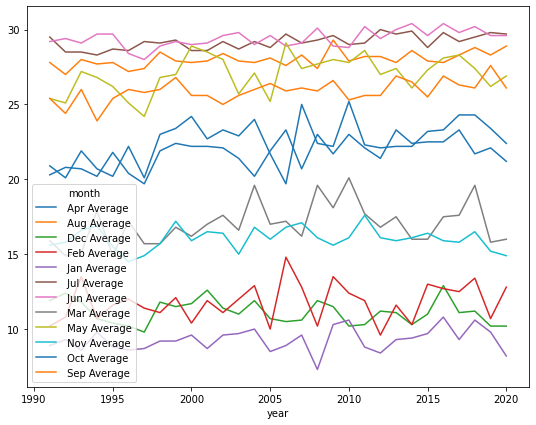

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

#for visualization of initial dataset
tp = pd.read_csv('pk_temp.csv')
tp.pivot_table(values="temperature", index="year", columns="month").plot(figsize=(9,7))

In [2]:
#using training dataset to train model. 
tp = pd.read_csv('pk_temp_train.csv')
tp.head()

,temperature,year,month
0,29.1,1998,Jul Average
1,26.8,1994,May Average
2,26.1,2018,Sep Average
3,25.1,1996,May Average
4,11.6,2013,Feb Average


In [3]:
import datetime
tp_test = tp['month'].map(lambda x: x.lstrip(' ').rstrip('Average'))
tp_test_n = tp_test.map(lambda x: x.lstrip('').rstrip(' ')).to_numpy()
tp_test_months = []

for i in range (len(tp_test_n)):
    datetime_object = datetime.datetime.strptime(tp_test_n[i], "%b")
    month_number = datetime_object.month
    tp_test_months.append(month_number)

tp_input_month = pd.DataFrame(tp_test_months, columns=['month'])
tp['month'] = tp_input_month['month']
print (tp)

     temperature  year  month
0           29.1  1998      7
1           26.8  1994      5
2           26.1  2018      9
3           25.1  1996      5
4           11.6  2013      2
..           ...   ...    ...
247         17.5  2016      3
248         21.9  1993      4
249         21.9  1998     10
250         27.4  2018      5
251         11.4  2002     12

[252 rows x 3 columns]


-41.444815355809595
[0.02980587 0.36908013]
     Actual-temp  Predicted-temp
0           29.1       20.690883
1           26.8       19.833500
2           26.1       22.025161
3           25.1       19.893111
4           11.6       19.292571
..           ...             ...
247         17.5       19.751069
248         21.9       19.434614
249         21.9       21.798124
250         27.4       20.548841
251         11.4       22.655508

[252 rows x 2 columns]


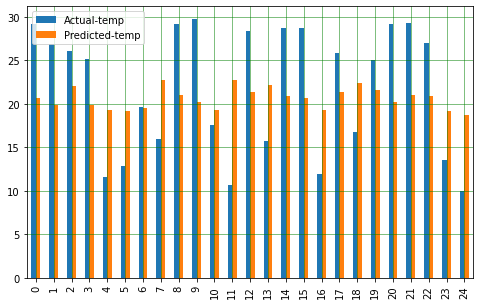

In [4]:
from sklearn.metrics import accuracy_score
tp_output = tp['temperature']
tp_input = tp[['year','month']]
lr_model = LinearRegression()
lr_model.fit(tp_input, tp_output)
tp_predict = lr_model.predict(tp_input)

print(lr_model.intercept_)
print(lr_model.coef_)

df = pd.DataFrame({'Actual-temp': tp_output, 'Predicted-temp': tp_predict})
print(df)

df1 = df.head(25)
df1.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [5]:
user_input_month = 4
user_input_year = 2021 
test_user_predict = lr_model.predict([[user_input_year, user_input_month]]) 
print (test_user_predict)

[20.26917816]


In [6]:
#model to pickle
pd.to_pickle(lr_model,r'..\temp_model.pickle')